In [36]:
import pandas as pd

In [78]:
def read_log(path):
    out = dict()
    with open(path, 'r') as f:
        lines = f.read().splitlines()

    args = dict()
    df = pd.DataFrame(columns=['epoch', 'batch', 'time', 'time_0', 'data', 'data_0', 'Xent', 'Xent_0', 'Htri', 'Htri_0', 'Acc', 'Acc_0'])

    for line in lines:
        if line.startswith('Experiment time'):
            out['time'] = line[16:]
        elif line.startswith('Args'):
            #Args:Namespace
            l = line[15:-1]
            l = l.split(', ')
            i=0
            while i < len(l):
                arg = l[i]
                if arg.startswith('stepsize'):
                    arg += ', ' + l[i+1]
                    k,v = arg.split('=')
                    args[k] = v
                    i+=1
                else:
                    k,v = arg.split('=')
                    args[k] = v
                i+=1
        elif line.startswith('Epoch:'):
            d = []
            ll = line.split('\t')
            for l in ll:
                l = l.split(' ')
                if l==['']:
                    pass
                elif l[0] == 'Epoch:':
                    a = l[1].index(']')
                    d.append(int(l[1][1:a]))
                    d.append(l[1][a+1:])
                else:
                    d.append(float(l[1]))
                    d.append(float(l[2][1:-1]))
            df.loc[len(df)] = d
    out['args'] = args
    out['df'] = df
            
    return out 

In [79]:
out = read_log('logs/mobilenet_v3_small-veri/log_train.txt')

In [80]:
out['df']

,epoch,batch,time,time_0,data,data_0,Xent,Xent_0,Htri,Htri_0,Acc,Acc_0
0,1,[10/590],0.083,0.354,0.0003,0.0467,6.3554,6.3735,0.2342,0.2362,1.56,0.16
1,1,[20/590],0.091,0.222,0.0003,0.0235,6.3649,6.3407,0.1946,0.2365,0.00,0.39
2,1,[30/590],0.084,0.177,0.0003,0.0158,6.2777,6.3098,0.2076,0.2185,1.56,0.68
3,1,[40/590],0.085,0.154,0.0003,0.0119,6.2454,6.2931,0.1246,0.1970,0.00,0.86
4,1,[50/590],0.083,0.140,0.0003,0.0096,6.2270,6.2575,0.0000,0.1805,1.56,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...
585,10,[550/590],0.084,0.086,0.0003,0.0010,0.1828,0.1285,0.0862,0.0200,95.31,98.42
586,10,[560/590],0.084,0.086,0.0002,0.0010,0.1865,0.1287,0.0000,0.0198,96.88,98.42
587,10,[570/590],0.083,0.086,0.0003,0.0009,0.0980,0.1288,0.0436,0.0199,100.00,98.43
588,10,[580/590],0.084,0.086,0.0004,0.0009,0.0954,0.1285,0.0000,0.0200,100.00,98.44


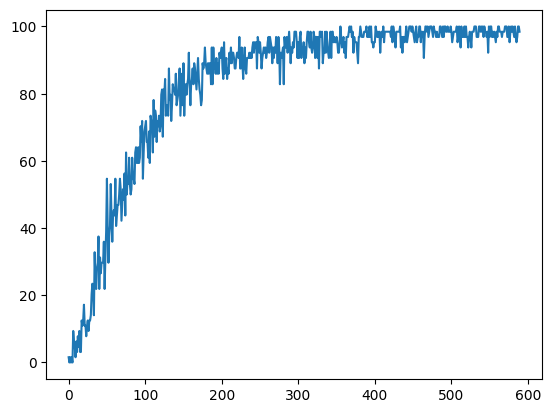

In [84]:
from matplotlib import pyplot as plt

plt.plot(out['df']['Acc'])